In [2]:
from tsai.all import *
import logging
import matplotlib.pyplot as plt

In [4]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [5]:
def list_from_file(filename):
    with open(filename, "rb") as fp:
        return pickle.load(fp)

In [6]:
file_for_train_data = 'train_data'
file_for_train_data_x = file_for_train_data + '_x'
file_for_train_data_y = file_for_train_data + '_y'

In [7]:
logger.info(f"Save lists with train data to files: {file_for_train_data_x}, {file_for_train_data_y}")
X = list_from_file(file_for_train_data_x)
Y = list_from_file(file_for_train_data_y)

INFO:__main__:Save lists with train data to files: train_data_x, train_data_y


In [7]:
logger.info("Split data to train and valid")
#Set show plot to True if you want to see split, but this stops main thread
splits = get_splits(Y, valid_size=.2, stratify=True, random_state=23, shuffle=True, show_plot=False)

INFO:__main__:Split data to train and valid


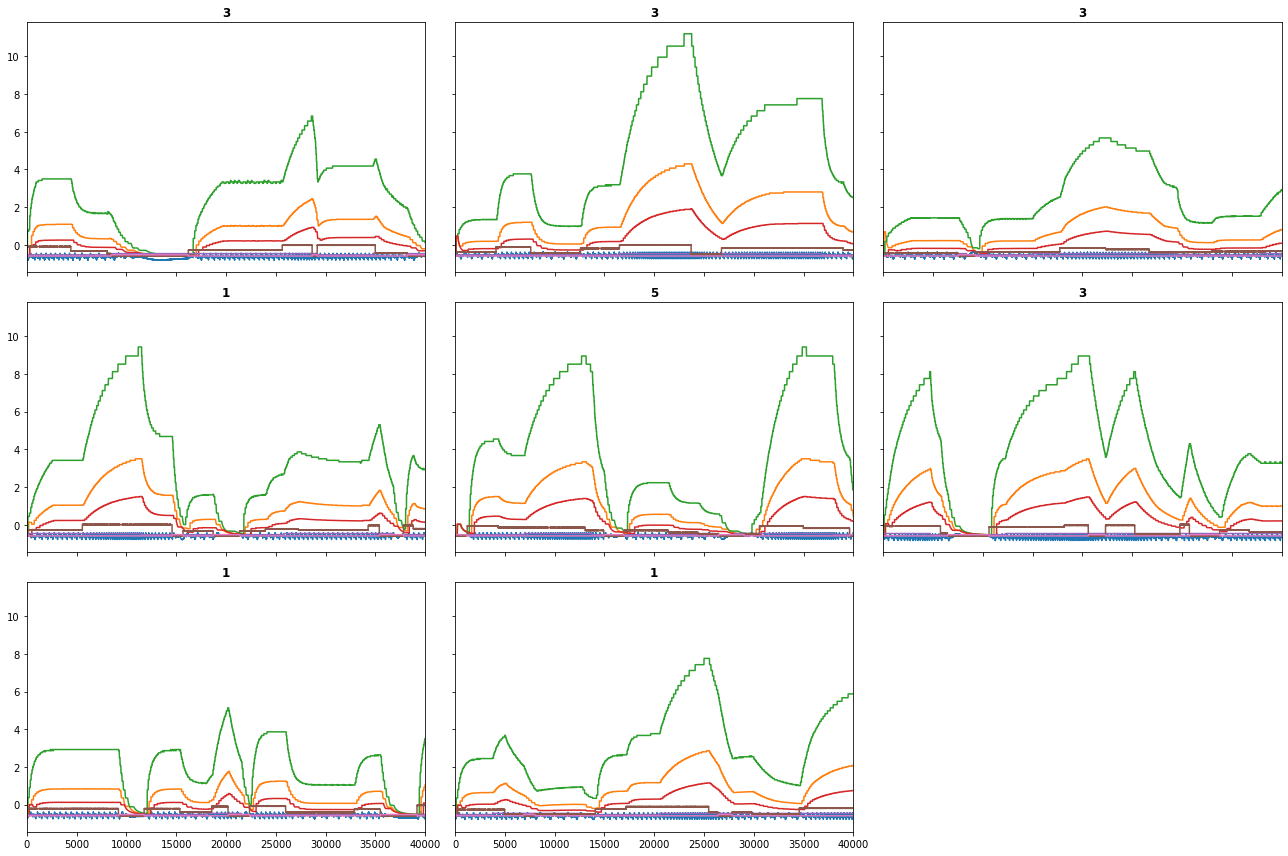

In [8]:
tfms  = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, Y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=8)
dls.show_batch(sharey=True)

In [9]:
logger.info("Initialize learner")
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
logger.info("Save learner as stage0")
learn.save('stage0')

INFO:__main__:Initialize learner
INFO:__main__:Save learner as stage0


Path('models/stage0.pth')

INFO:__main__:Initialize learner


epoch,train_loss,valid_loss,accuracy,time
0,1.984062,1.995432,0.243902,13:42
1,1.808354,1.668930,0.365854,12:35
2,1.738324,1.579810,0.365854,08:39
3,1.683846,1.672498,0.317073,08:32
4,1.652249,1.604633,0.341463,08:31
5,1.614981,1.575781,0.365854,08:32
6,1.586537,1.582611,0.292683,08:32
7,1.566229,1.555014,0.268293,08:30
8,1.543886,1.540957,0.292683,08:31
9,1.525398,1.539099,0.317073,08:34


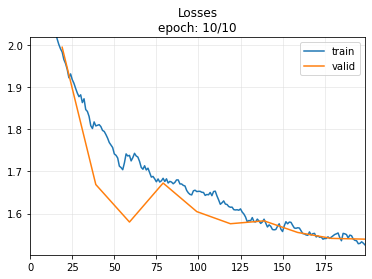

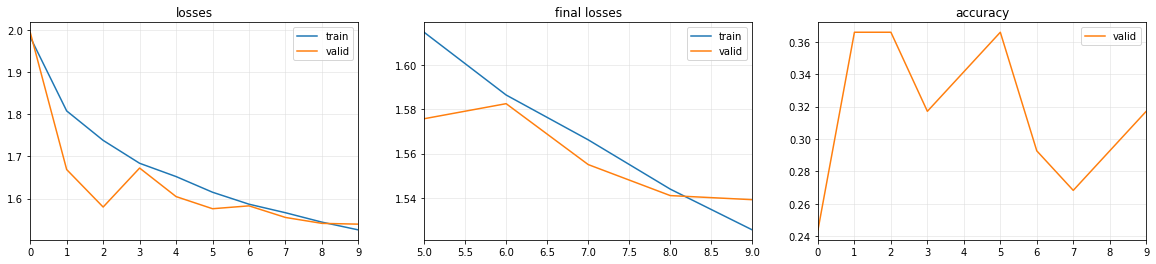

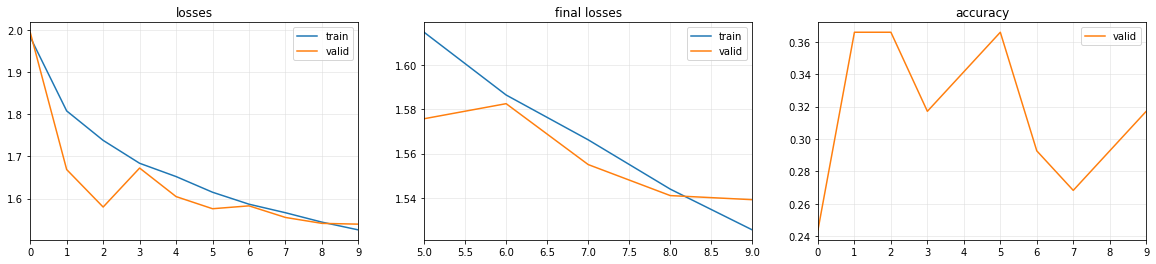

In [10]:
logger.info("Initialize learner")
learn.fit_one_cycle(10, lr_max=1e-3)
learn.save('stage1')
learn.recorder.plot_metrics()

In [11]:
PATH = Path('./Multiclass.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


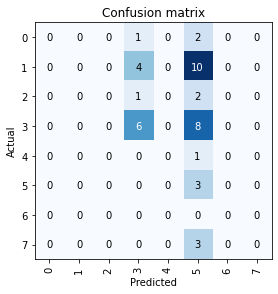

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

learn.save_all(path='export', dls_fname='dls', model_fname='model', learner_fname='learner')
#sF - Dryft czujnika
#sV - Shaft Wear, Zużycie wału
#sT - Tooth fault, Uszkodzenie zęba przekładni

#faultCode = sF + 2*sV + 4*sT
# 0 - brak uszkodzeń
# 1 - Dryft czujnika
# 2 - Zużycie wału
# 3 - Dryft czujnika + Zużycie wału
# 4 - Uszkodzenie zęba przekładni
# 5 - Uszkodzenie zęba przekładni + Dryft czujnika
# 6 - Uszkodzenie zęba przekładni + Zużycie wału
# 7 - Uszkodzenie zęba przekładni + Zużycie wału + Dryft czujnika

(array([15., 70., 15., 70.,  3., 16., 19.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

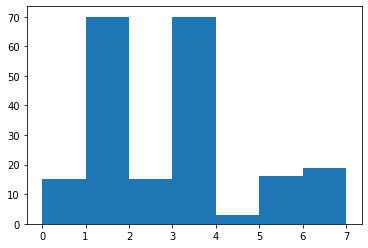

In [8]:
plt.hist(Y, 7)